# Tesla Stock Prediction using LSTM in python

I have predicted the stock price of tesla by training the model and organising the data into input sequences and target sequences. Once the model is trained and validated, use it to make predictions on new or unseen data. For Tesla stock prediction, input the most recent historical data and obtain the model's prediction for the next day's stock price.



In [4]:
import pandas as pd

df = pd.read_csv('TSLA.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-02-14,2.116000,2.252667,2.093333,2.211333,2.211333,27162000
1,2012-02-15,2.206667,2.294000,2.151333,2.240000,2.240000,41427000
2,2012-02-16,2.233333,2.300667,2.169333,2.278667,2.278667,33295500
3,2012-02-17,2.266000,2.331333,2.233333,2.331333,2.331333,20650500
4,2012-02-21,2.324667,2.324667,2.254000,2.300000,2.300000,17037000
...,...,...,...,...,...,...,...
2906,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500
2907,2023-09-05,245.000000,258.000000,244.860001,256.489990,256.489990,129469600
2908,2023-09-06,255.139999,255.389999,245.059998,251.919998,251.919998,116959800
2909,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900


In [5]:
df = df[['Date', 'Close']]

df

,Date,Close
0,2012-02-14,2.211333
1,2012-02-15,2.240000
2,2012-02-16,2.278667
3,2012-02-17,2.331333
4,2012-02-21,2.300000
...,...,...
2906,2023-09-01,245.009995
2907,2023-09-05,256.489990
2908,2023-09-06,251.919998
2909,2023-09-07,251.490005


In [6]:
df['Date']

0       2012-02-14
1       2012-02-15
2       2012-02-16
3       2012-02-17
4       2012-02-21
           ...    
2906    2023-09-01
2907    2023-09-05
2908    2023-09-06
2909    2023-09-07
2910    2023-09-08
Name: Date, Length: 2911, dtype: object

In [7]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('2012-02-17')
datetime_object

datetime.datetime(2012, 2, 17, 0, 0)

In [8]:
df

,Date,Close
0,2012-02-14,2.211333
1,2012-02-15,2.240000
2,2012-02-16,2.278667
3,2012-02-17,2.331333
4,2012-02-21,2.300000
...,...,...
2906,2023-09-01,245.009995
2907,2023-09-05,256.489990
2908,2023-09-06,251.919998
2909,2023-09-07,251.490005


In [9]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

C:\Users\DeLL\AppData\Local\Temp\ipykernel_4824\2565755782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      2012-02-14
1      2012-02-15
2      2012-02-16
3      2012-02-17
4      2012-02-21
          ...    
2906   2023-09-01
2907   2023-09-05
2908   2023-09-06
2909   2023-09-07
2910   2023-09-08
Name: Date, Length: 2911, dtype: datetime64[ns]

In [10]:
df.index = df.pop('Date')
df

,Close
Date,
2012-02-14,2.211333
2012-02-15,2.240000
2012-02-16,2.278667
2012-02-17,2.331333
2012-02-21,2.300000
...,...
2023-09-01,245.009995
2023-09-05,256.489990
2023-09-06,251.919998


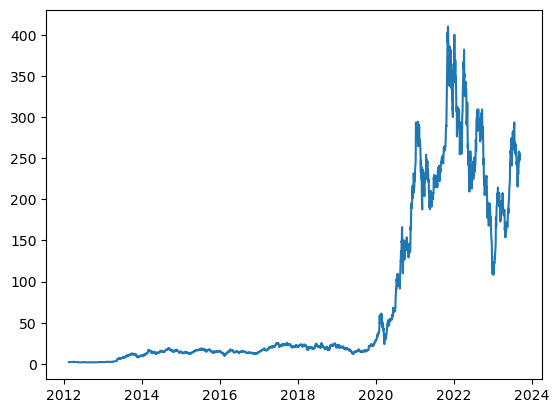

In [11]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [12]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df, 
                                '2021-03-25', 
                                '2022-03-23', 
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,223.333328,220.720001,210.089996,213.463333
1,2021-03-26,220.720001,210.089996,213.463333,206.236664
2,2021-03-29,210.089996,213.463333,206.236664,203.763336
3,2021-03-30,213.463333,206.236664,203.763336,211.873337
4,2021-03-31,206.236664,203.763336,211.873337,222.643326
...,...,...,...,...,...
247,2022-03-17,255.456665,267.296661,280.076660,290.533325
248,2022-03-18,267.296661,280.076660,290.533325,301.796661
249,2022-03-21,280.076660,290.533325,301.796661,307.053345
250,2022-03-22,290.533325,301.796661,307.053345,331.326660


In [13]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

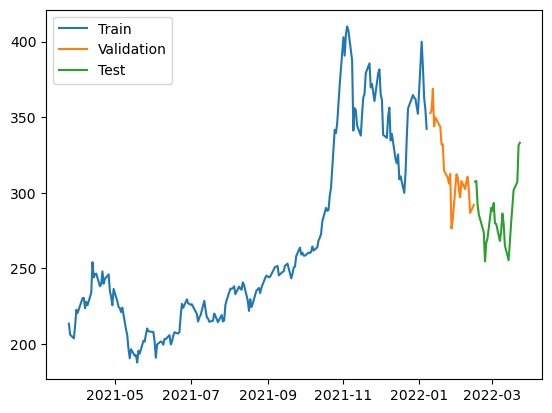

In [14]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 2s 77ms/step - loss: 73373.9844 - mean_absolute_error: 264.0461 - val_loss: 100385.4375 - val_mean_absolute_error: 315.9326
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 73122.0859 - mean_absolute_error: 263.5727 - val_loss: 100080.8203 - val_mean_absolute_error: 315.4503
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 72856.3047 - mean_absolute_error: 263.0617 - val_loss: 99693.2422 - val_mean_absolute_error: 314.8352
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 72484.6484 - mean_absolute_error: 262.3550 - val_loss: 99140.0000 - val_mean_absolute_error: 313.9554
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 71997.6484 - mean_absolute_error: 261.4219 - val_loss: 98503.6875 - val_mean_absolute_error: 312.9407
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 71440.7031 - mean_absolute_error: 260.3531 - val_loss: 97750.

Epoch 49/100
7/7 [==============================] - 0s 9ms/step - loss: 1257.2362 - mean_absolute_error: 26.8958 - val_loss: 1037.8584 - val_mean_absolute_error: 28.0692
Epoch 50/100
7/7 [==============================] - 0s 8ms/step - loss: 1093.0098 - mean_absolute_error: 24.2012 - val_loss: 774.5754 - val_mean_absolute_error: 23.3463
Epoch 51/100
7/7 [==============================] - 0s 8ms/step - loss: 884.0834 - mean_absolute_error: 21.1402 - val_loss: 644.9250 - val_mean_absolute_error: 20.9952
Epoch 52/100
7/7 [==============================] - 0s 8ms/step - loss: 728.7333 - mean_absolute_error: 18.7559 - val_loss: 580.6595 - val_mean_absolute_error: 19.9651
Epoch 53/100
7/7 [==============================] - 0s 8ms/step - loss: 598.2717 - mean_absolute_error: 16.2301 - val_loss: 330.4753 - val_mean_absolute_error: 13.6278
Epoch 54/100
7/7 [==============================] - 0s 8ms/step - loss: 495.4875 - mean_absolute_error: 14.5751 - val_loss: 280.6627 - val_mean_absolute_erro

Epoch 98/100
7/7 [==============================] - 0s 9ms/step - loss: 103.8046 - mean_absolute_error: 6.9920 - val_loss: 303.2751 - val_mean_absolute_error: 13.8972
Epoch 99/100
7/7 [==============================] - 0s 9ms/step - loss: 103.4081 - mean_absolute_error: 7.1703 - val_loss: 198.7835 - val_mean_absolute_error: 10.3042
Epoch 100/100
7/7 [==============================] - 0s 8ms/step - loss: 97.9736 - mean_absolute_error: 6.8861 - val_loss: 224.8278 - val_mean_absolute_error: 10.9917


7/7 [==============================] - 0s 3ms/step


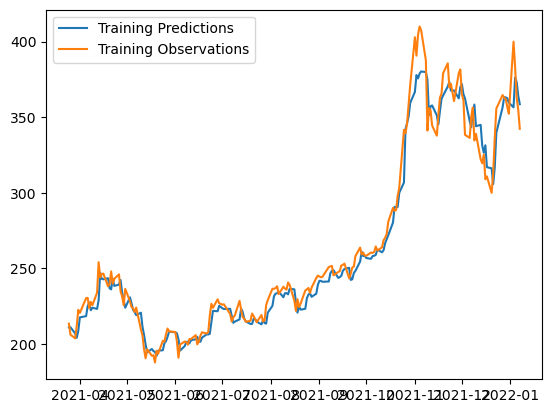

In [16]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 24ms/step


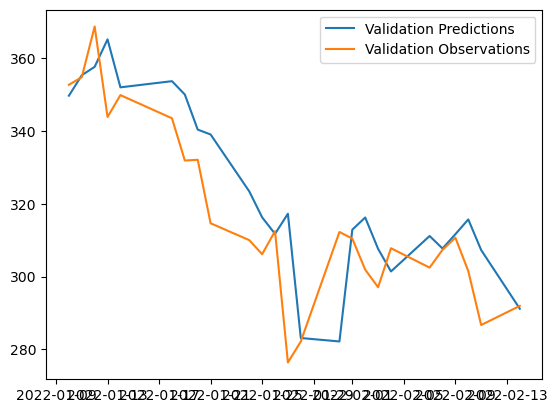

In [17]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 22ms/step


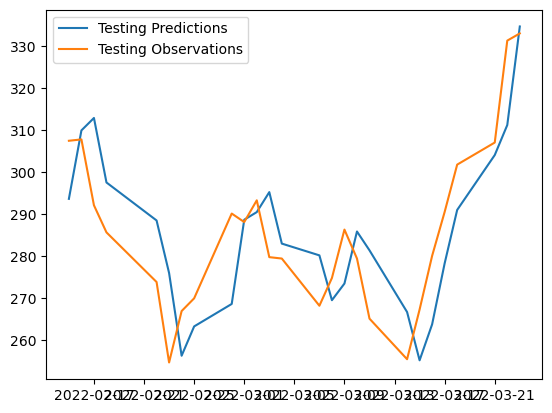

In [18]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

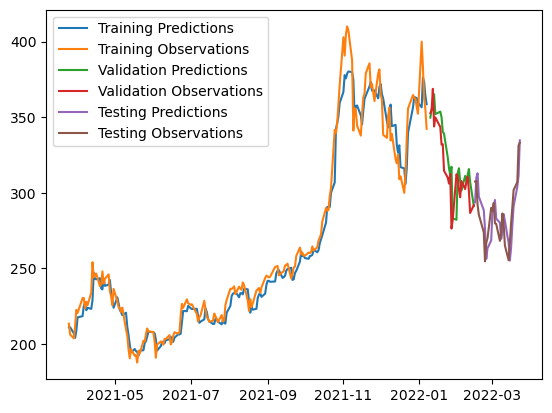

In [19]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations'])

In [20]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 23ms/step


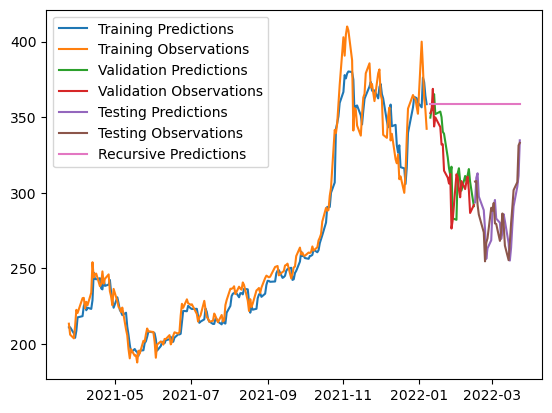

In [21]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])